Hackalytics.io GT Machine Learning Training in Python

0.4276932315946236
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]


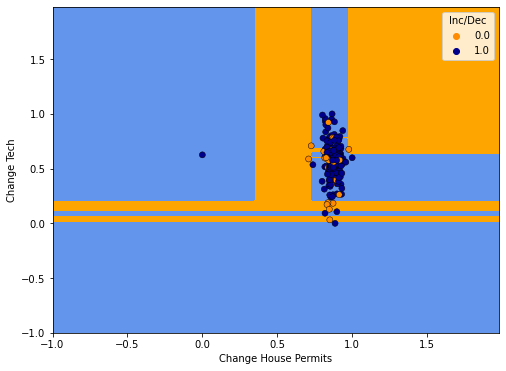

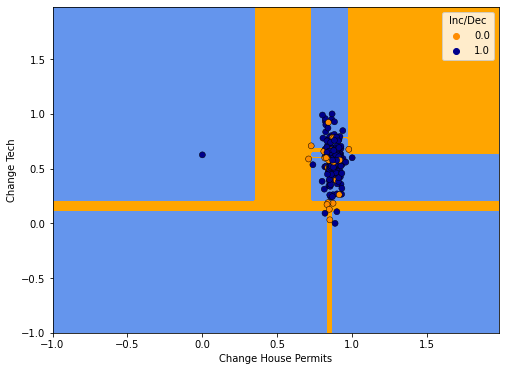

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn import preprocessing
from scipy import signal
import pickle

from sklearn.linear_model import LinearRegression

# Determines what data is stored
raw = pd.read_csv("FullData.csv")
Labels = ["Change House Permits", "Money Stock", "Change Money Stock", "Percent Savings", "Change Percent Savings", "Unemployment Rate", "Change Unemployment Rate", 
          "Change Durable Goods", "Change Non Defense", "Change Machinery", "Change stocks", "GDP", "Inc/Dec", "USD", "Change Tech", "Change Vehicle",
          "Consumer Confidence", "Change Consumer Confidence", "Business Confidence", "Change Business Confidence", "Change Gold"]

# Initializeds data preprocessing
min_max = preprocessing.MinMaxScaler()
data = min_max.fit_transform(raw[Labels].values)
data = pd.DataFrame(data, columns=Labels)

# Subsamples stock data
incompatible_data = pd.read_csv("IncompatibleData.csv")
incompatible_data = min_max.fit_transform(incompatible_data.values)
incompatible_data = pd.DataFrame(incompatible_data, columns=["Stocks", "Volume"])
incompatible_data = pd.DataFrame(incompatible_data[::21].reset_index()[0:236][["Stocks", "Volume"]])
data = pd.concat([data, incompatible_data], axis=1)

# Smoothens training data for regression
a,b = signal.butter(2, 18, 'lp', fs=350)
raw["Change Nominal"] = signal.filtfilt(a,b, raw["Change Nominal"])
raw["GDP"] = signal.filtfilt(a,b, raw["GDP"])
raw["Change Converted Nominal"] = signal.filtfilt(a,b, raw["Change Converted Nominal"])
temp = raw.loc[1:len(raw["GDP"])+1, "GDP"].reset_index(drop = True) - raw.loc[0:len(raw["GDP"]), "GDP"]
raw["Change GDP"] = pd.Series([0]).append(pd.Series(temp)).reset_index(drop = True)[0:len(temp)]

# Choose targets
# Traditional : "Change House Permits", "Change Money Stock", "Change Percent Savings"
# Novel : "Change Unemployment Rate", "Change Durable Goods", "Change Non Defense", "Change Machinery", "Change stocks", "USD", "Change Tech", "Change Vehicle"
# Experimental : "Change Consumer Confidence", "Change Business Confidence", "Change Gold"
test1 = "Change House Permits"
test2 = "Change Tech"
test3 =  ["Change House Permits", "Change Money Stock", "Change Percent Savings"]
target1 = "Inc/Dec"
target2 = "Change Converted Nominal"

# Training sets
X = data[[test1, test2]]
Y = data[target1]
X1 = pd.DataFrame(data[test3])
Y1 = raw[target2]

#Training
reg = LinearRegression().fit(X1, Y1)
print(reg.score(X1,Y1))
W = reg.predict(X1)
pred = pd.concat([raw["DATE"], pd.DataFrame(W, columns = ["Predict"])], axis = 1)

# Stores predictions
outfile = open("Training/TraditionalConvertedNominal.pkl",'wb')
pickle.dump(pred,outfile)
outfile.close()

# Sets constants
h = .02  # step size in the mesh
n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[test1].min() - 1, X[test1].max() + 1
    y_min, y_max = X[test2].min() - 1, X[test2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[test1], y=X[test2], hue=Y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn import preprocessing
from scipy import signal
import pickle

raw = pd.read_csv("FullData.csv")
Labels = ["Change House Permits", "Money Stock", "Change Money Stock", "Percent Savings", "Change Percent Savings", "Unemployment Rate", "Change Unemployment Rate", 
          "Change Durable Goods", "Change Non Defense", "Change Machinery", "Change stocks", "GDP", "Inc/Dec", "USD", "Change Tech", "Change Vehicle",
          "Consumer Confidence", "Change Consumer Confidence", "Business Confidence", "Change Business Confidence", "Change Gold"]

pred = pd.concat([raw["DATE"], pd.DataFrame(raw["Change GDP"], columns = ["Predict"])], axis = 1)

outfile = open("Training/Original.pkl",'wb')
pickle.dump(pred,outfile)
outfile.close()

In [45]:
from bs4 import BeautifulSoup
# html_string = """
# <g><text fill ="whoo"> hello world! </fill></g>
# """
# soup = BeautifulSoup(html_string, 'html.parser')
# for text_tag in soup.findAll('p', recursive=True, limit=None):
#     text_tag['fill'] = "rgb(255,255,255)"
# # soup.p['style'] = "as;dkfjasdkljf"
# rep = html_string.replace("<text", "<text style=\"fill:rgb(255,255,255)\"")
# print(soup)
# print(rep)
import os
import requests

os.environ['NO_PROXY'] = '127.0.0.1'
r = requests.get('http://127.0.0.1:8000/stocks/display_data')
# http://localhost:8000/stocks/display_data
soup = BeautifulSoup(r.content, 'html.parser')
# for g in soup.findAll("svg", {"class": "mpld3-figure"}):
#     print(g)
# for text_tag in soup.findAll('text', recursive=True, limit=None):
#     text_tag['fill'] = "rgb(255,255,255)"
#     print(text_tag)
# print(soup.prettify())
# print(r.prettify())
soup.find(id="graph").findChildren("div")[0].findChildren("svg")
print(soup.prettify())
# print("done")

<header class="intro">
 Novel, Experimental, and Traditional GDP Approximation In Numbers(
 <b id="bold">
  NET GAIN
 </b>
 )
</header>
<link href="/static/stocks/style.css" rel="stylesheet" type="text/css"/>
<link href="/static/Chicken2.gif" rel="icon"/>
<div class="grid-container2" id="TopSection">
 <div id="graph">
  <style>
  </style>
  <div id="fig_el273614485116764806923591067">
  </div>
  <script>
   function mpld3_load_lib(url, callback){
  var s = document.createElement('script');
  s.src = url;
  s.async = true;
  s.onreadystatechange = s.onload = callback;
  s.onerror = function(){console.warn("failed to load library " + url);};
  document.getElementsByTagName("head")[0].appendChild(s);
}

if(typeof(mpld3) !== "undefined" && mpld3._mpld3IsLoaded){
   // already loaded: just create the figure
   !function(mpld3){
       
       mpld3.draw_figure("fig_el273614485116764806923591067", {"width": 800.0, "height": 800.0, "axes": [{"bbox": [0.125, 0.10999999999999999, 0.775, 0.77], 